In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IDEA: hacer un grafico de lineas, y mostrar como fue variando el alquiler
#de bicicletas a traves de 2013,2014 y 2015

In [2]:
station = pd.read_csv('tp_bike/station.csv')

In [4]:
station.head(2)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013


In [30]:
station.groupby('id').count().tail(5)

,name,lat,long,dock_count,city,installation_date
id,,,,,,
77,1,1,1,1,1,1
80,1,1,1,1,1,1
82,1,1,1,1,1,1
83,1,1,1,1,1,1
84,1,1,1,1,1,1


In [5]:
trip = pd.read_csv('tp_bike/trip.csv')

In [27]:
#se puede refactorizar este metodo? lo hize de una manera muy chota
trip.loc[:,:].sort_values('start_station_id', ascending = True)\
             .groupby('start_station_id').count().head(10)
#aca tengo la cantidad de veces, que se salieron de cada estacion    

,id,duration,start_date,start_station_name,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
start_station_id,,,,,,,,,,
2,9558,9558,9558,9558,9558,9558,9558,9558,9558,9526
3,1594,1594,1594,1594,1594,1594,1594,1594,1594,1547
4,3861,3861,3861,3861,3861,3861,3861,3861,3861,3833
5,1257,1257,1257,1257,1257,1257,1257,1257,1257,1249
6,2917,2917,2917,2917,2917,2917,2917,2917,2917,2895
7,2233,2233,2233,2233,2233,2233,2233,2233,2233,2213
8,1692,1692,1692,1692,1692,1692,1692,1692,1692,1679
9,1910,1910,1910,1910,1910,1910,1910,1910,1910,1892
10,2393,2393,2393,2393,2393,2393,2393,2393,2393,2377


In [33]:

trip.loc[:,:].sort_values('end_station_id', ascending = True)\
             .groupby('end_station_id').count().head(10)
#aca tengo cuantas veces se llego a cada estacion    

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,bike_id,subscription_type,zip_code
end_station_id,,,,,,,,,,
2,9415,9415,9415,9415,9415,9415,9415,9415,9415,9382
3,1786,1786,1786,1786,1786,1786,1786,1786,1786,1734
4,3705,3705,3705,3705,3705,3705,3705,3705,3705,3686
5,1169,1169,1169,1169,1169,1169,1169,1169,1169,1159
6,3163,3163,3163,3163,3163,3163,3163,3163,3163,3135
7,2498,2498,2498,2498,2498,2498,2498,2498,2498,2484
8,1707,1707,1707,1707,1707,1707,1707,1707,1707,1693
9,2200,2200,2200,2200,2200,2200,2200,2200,2200,2181
10,1658,1658,1658,1658,1658,1658,1658,1658,1658,1639


In [36]:
#1 conclusion (tal vez trivial) se usan las 70 estaciones, tanto para la
#llegada como para la salida
#Pregunta: se puede salir y llegar a una misma estacion? la logica indicaria
#que si, entonces cuantos viajes con esta particularidad existen?
trip.info()
#ojo que en el zip hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 40.9+ MB


In [37]:
#IDEA: Quiero saber la estacion mas usadad de cada ciudad
#idem pero con las estaciones de llegada
#idem con la de partida
#hacer visus, bart chart apilado: eje x cada año, cada barra tiene 10 colores
#o menos
trip.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [42]:
#Dame las 10 estaciones que mas veces se usaron como partida
trip['quantity_start_station_per_id'] = 1
trip.head(2)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,num_id_station
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,1
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,1


In [86]:
trip.rename(columns = {'cantidad_start_station_id': 'quantity_start_station_per_id'}, inplace = True)

In [87]:
trip.dtypes

id                                int64
duration                          int64
start_date                       object
start_station_name               object
start_station_id                  int64
end_date                         object
end_station_name                 object
end_station_id                    int64
bike_id                           int64
subscription_type                object
zip_code                         object
quantity_start_station_per_id     int64
dtype: object

In [88]:
#primer forma de hacerlo
trip.groupby('start_station_id').sum()\
    .sort_values('quantity_start_station_per_id', ascending = False).head(10)

,id,duration,end_station_id,bike_id,quantity_start_station_per_id
start_station_id,,,,,
70,22686598361,40577832,2931114,21867237,49092
69,17647117810,23286777,2021248,14970177,33742
50,15131791326,49236138,2015099,14698881,32934
60,12562190295,39112336,1688943,12385352,27713
55,12429248747,17099647,1633964,11617497,26089
61,12162232812,20454248,1564890,11514521,25837
74,11840873321,23241129,1547043,11042668,24838
77,10388674997,22315475,1497499,10795732,24172
65,11540558785,16049819,1523294,10508434,23724


In [112]:
#otra forma de hacerlo
grupo = trip.groupby('start_station_id').agg('count')\
            .sort_values('id', ascending = False).reset_index()[0:10]

In [113]:
grupo[0:10]

,start_station_id,id,duration,start_date,start_station_name,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,quantity_start_station_per_id
0,70,49092,49092,49092,49092,49092,49092,49092,49092,49092,48916,49092
1,69,33742,33742,33742,33742,33742,33742,33742,33742,33742,33658,33742
2,50,32934,32934,32934,32934,32934,32934,32934,32934,32934,32312,32934
3,60,27713,27713,27713,27713,27713,27713,27713,27713,27713,26934,27713
4,55,26089,26089,26089,26089,26089,26089,26089,26089,26089,25995,26089
5,61,25837,25837,25837,25837,25837,25837,25837,25837,25837,25663,25837
6,74,24838,24838,24838,24838,24838,24838,24838,24838,24838,24598,24838
7,77,24172,24172,24172,24172,24172,24172,24172,24172,24172,23981,24172
8,65,23724,23724,23724,23724,23724,23724,23724,23724,23724,23656,23724
9,67,20272,20272,20272,20272,20272,20272,20272,20272,20272,20097,20272


In [114]:
#Las 10 estaciones de salida mas usadas 
topEstacionesSalida = grupo.loc[:,('start_station_id', 'id')]
topEstacionesSalida

,start_station_id,id
0,70,49092
1,69,33742
2,50,32934
3,60,27713
4,55,26089
5,61,25837
6,74,24838
7,77,24172
8,65,23724
9,67,20272


In [110]:
#idem con las estaciones de llegada
grupo = trip.groupby('end_station_id').agg('count')\
            .sort_values('id', ascending = False).reset_index()[0:10]
topEstacionesLlegada = grupo.loc[:,('end_station_id', 'id')]
topEstacionesLlegada

,end_station_id,id
0,70,63179
1,69,35117
2,50,33193
3,60,30796
4,61,28529
5,77,28033
6,65,26637
7,74,25025
8,55,23080
9,76,19915


In [ ]:
#analizar los cuadros, para el informe claramente las 4 primeras estaciones 
#son las que mas se usan
#IMPORTANTE: ME GUSTARIA TENER EL NOMBRE DE CADA ESTACION, COMO LO HAGO?

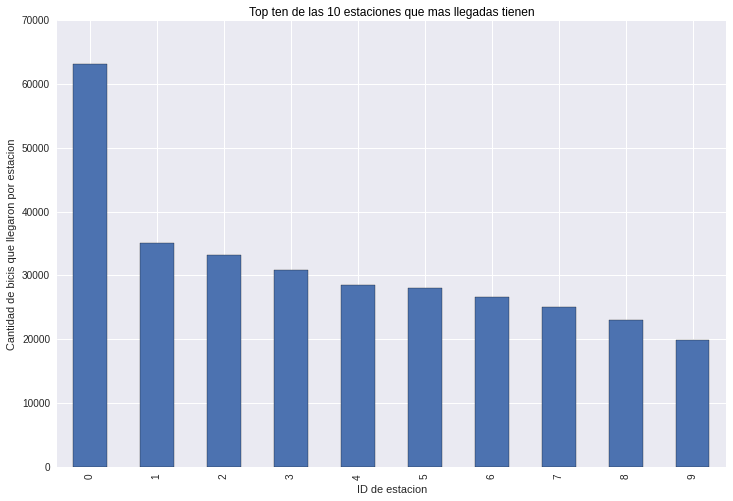

In [106]:
#Plots
plt.title('Top ten de las 10 estaciones que mas llegadas tienen', color = 'Black')
topEstacionesLlegada['id']\
    .plot(kind = 'bar', figsize = (12,8));
plt.xlabel('ID de estacion')  #QUIERO QUE APAREZCA EL ID EN EL EJE X
plt.ylabel('Cantidad de bicis que llegaron por estacion')
#LO IDEAL SERIA QUE EN EL EJE X ESTE EL NOMBRE DE LA ESTACION

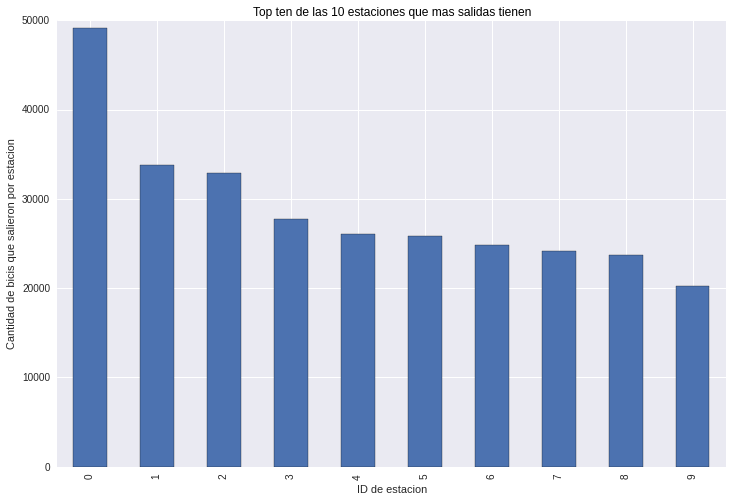

In [115]:
plt.title('Top ten de las 10 estaciones que mas salidas tienen', color = 'Black')
topEstacionesSalida['id']\
    .plot(kind = 'bar', figsize = (12,8));
plt.xlabel('ID de estacion')  #QUIERO QUE APAREZCA EL ID EN EL EJE X
plt.ylabel('Cantidad de bicis que salieron por estacion')